In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Load Data
games = pandas.read_csv("games.csv")

In [4]:
# Names of columns
print(games.columns)
print(games.shape )

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


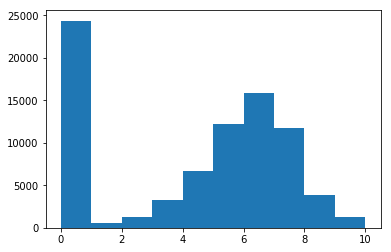

In [5]:
# Histogram of all the ratings
plt.hist(games["average_rating"])
plt.show()

In [7]:
# Print first row of all games with 0 score
print(games[games["average_rating"] == 0].iloc[0])  # Indexing by position

# Print first row of all games with score greater than 0
print(games[games["average_rating"] > 0].iloc[0])  # Indexing by position

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

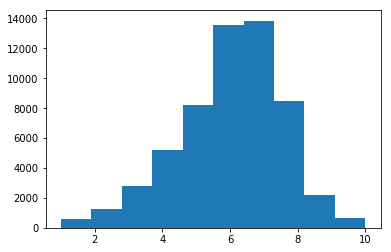

In [10]:
# Remove rows without user review
games = games[games["users_rated"] > 0]

# Remove rows with missing values
games = games.dropna(axis=0)

# Make a histogram
plt.hist(games["average_rating"])
plt.show()

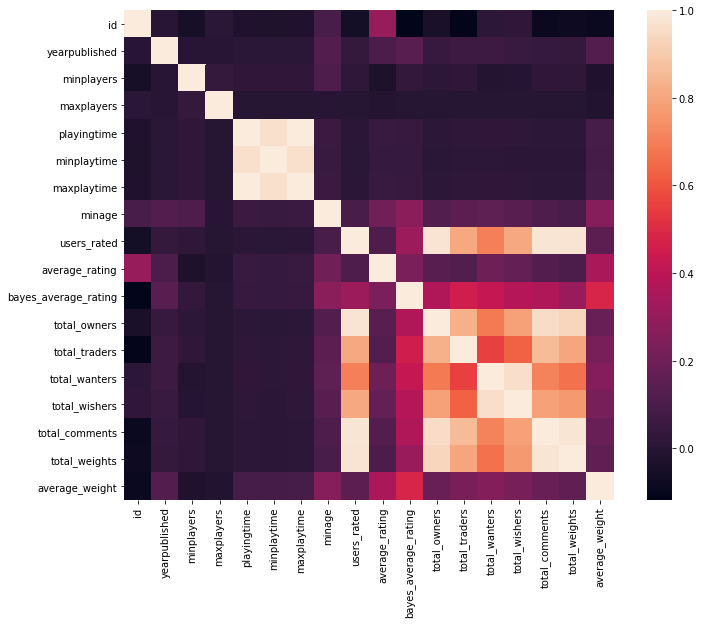

In [15]:
# Correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()

In [17]:
# Get all columns from dataframe
columns = games.columns.tolist()

# Filter columns to remove data we don't want
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable to be predicted
target = "average_rating"

In [19]:
# Generate training set
train = games.sample(frac = 0.8, random_state = 1)

# Select anything not in training set
test = games.loc[~games.index.isin(train.index)]

# Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [20]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
LR = LinearRegression()

# Fit the model on training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Generate the predictions for test set
predictions = LR.predict(test[columns])

# Computer error between test predictions and actual values
mean_squared_error(predictions, test[target])

2.078819032629324

In [22]:
# Import random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)

# Fit the data
RFR.fit(train[columns], train[target])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [23]:
# Make predictions
predictions = RFR.predict(test[columns])

# Computer error
mean_squared_error(predictions, test[target])

1.4458564605687358

In [26]:
test[columns].iloc[500]

yearpublished      1983.0000
minplayers            3.0000
maxplayers            6.0000
playingtime          45.0000
minplaytime          45.0000
maxplaytime          45.0000
minage               10.0000
users_rated        8560.0000
total_owners      12462.0000
total_traders       724.0000
total_wanters        82.0000
total_wishers       596.0000
total_comments     2392.0000
total_weights       819.0000
average_weight        1.9597
Name: 2669, dtype: float64

In [27]:
# Make predictions with both samples
rating_LR = LR.predict(test[columns].iloc[500].values.reshape(1, -1))
rating_RFR = RFR.predict(test[columns].iloc[500].values.reshape(1, -1))

# Print rating LR
print(rating_LR)
print(rating_RFR)

# Real rating
print(test[target].iloc[500])

[5.35909753]
[6.48119468]
6.5201400000000005
